In [80]:
#step 1
# basic 2 bit palindrome

In [81]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [82]:
test_string = '11'
binary_string = test_string

In [83]:
is_actually_palindrome = test_string == test_string[::-1]
print(f"Palindrome Check: {'YES' if is_actually_palindrome else 'NO'}")

Palindrome Check: YES


In [84]:
# Create 2 qubits for our string
# Plus 1 qubit to store the comparison result
qubits = QuantumRegister(3, 'q')
bits = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qubits, bits)

In [85]:
if test_string[0] == '1':
    circuit.x(qubits[0])

if test_string[1] == '1': 
    circuit.x(qubits[1])


In [86]:

circuit.cx(qubits[0], qubits[2])  
circuit.cx(qubits[1], qubits[2]) 

In [87]:
circuit.x(qubits[2])

In [88]:
circuit.measure([0, 1, 2], [0, 1, 2])

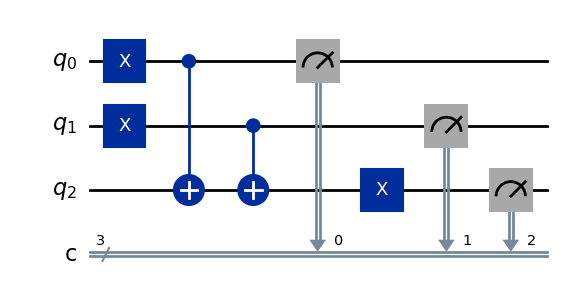

In [89]:
circuit.draw('mpl')

In [90]:
simulator = Aer.get_backend('aer_simulator')
job = simulator.run(circuit, shots=1024)
result = job.result()
counts = result.get_counts()

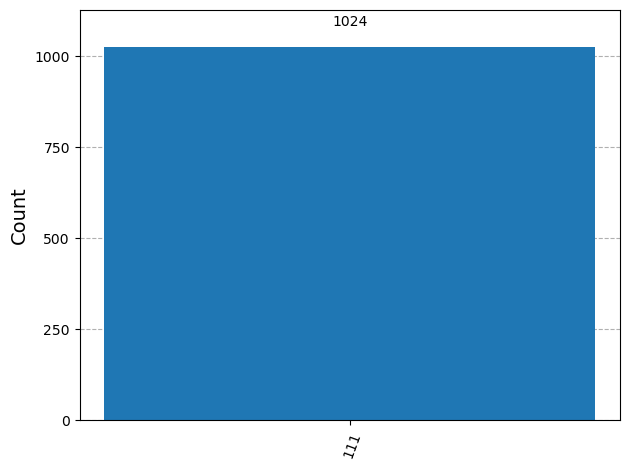

In [91]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

In [92]:
most_common_result = max(counts, key=counts.get)
result_digit = most_common_result[0]
print(f"Quantum result: {'Palindrome' if result_digit == '1' else 'Not palindrome'}")


Quantum result: Palindrome


for 3 qubits we can just compare 1 and 3 qubits and we can solve the problem

similarly,

4 bit string -> compare 1 and 4 , 2 and 3

5 bit string -> compare 1 and 5, 2 and 4

For any N-bit string:

Compare bit 0 with bit N-1
Compare bit 1 with bit N-2
Compare bit 2 with bit N-3
...
Stop when you reach the middle

but so far we are not implementing reversibility right..

In [118]:
while True:
    try:
        binary_string = input("Enter binary string: ").strip()
        
        # Validate input
        if not binary_string:
            print("Please enter something!")
            continue
        
        if not all(c in '01' for c in binary_string):
            print("Only 0s and 1s allowed!")
            continue
        
        if len(binary_string) < 2:
            print("Need at least 2 bits!")
            continue
        
        break
        
    except (KeyboardInterrupt, EOFError):
        print("\nExiting...")
        exit()

In [119]:
# Setup based on string length
string_length = len(binary_string)
num_pairs = string_length // 2

In [120]:
# Create registers dynamically
input_reg = QuantumRegister(string_length, 'input')
comparison_reg = QuantumRegister(num_pairs, 'comp')
result_reg = QuantumRegister(1, 'result')
ancilla_reg = QuantumRegister(num_pairs, 'ancilla')

input_classical = ClassicalRegister(string_length, 'input_meas')
comparison_classical = ClassicalRegister(num_pairs, 'comp_meas')
result_classical = ClassicalRegister(1, 'result_meas')
ancilla_classical = ClassicalRegister(num_pairs, 'ancilla_meas')